In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize
from fil_finder import FilFinder2D
import astropy.units as u

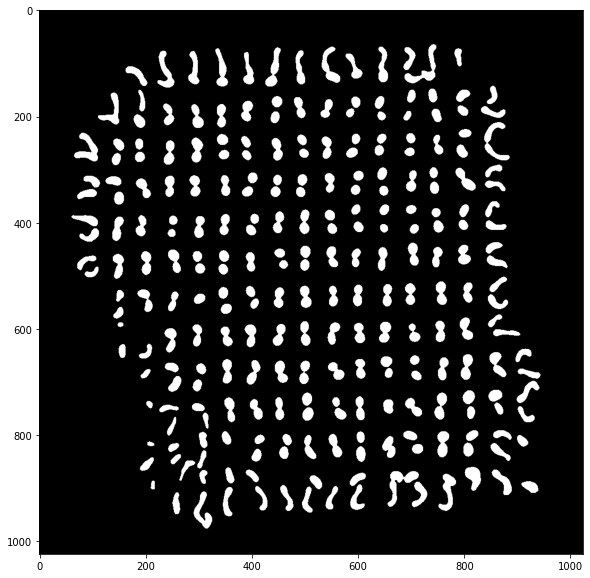

In [2]:
img = cv2.imread("cvMask.png")
plt.figure(figsize=(10,10))
plt.imshow(img)

/Users/iamsmurph/.virtualenvs/neuralTube/lib/python3.9/site-packages/fil_finder/filfinder2D.py:138: UserWarning: No beam width given. Using 0 pixels.
  warnings.warn("No beam width given. Using 0 pixels.")
/Users/iamsmurph/.virtualenvs/neuralTube/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iamsmurph/.virtualenvs/neuralTube/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iamsmurph/.virtualenvs/neuralTube/lib/python3.9/site-packages/fil_finder/filfinder2D.py:288: UserWarning: Using inputted mask. Skipping creation of anew mask.
  warnings.warn("Using inputted mask. Skipping creation of a"
/Users/iamsmurph/.virtualenvs/neuralTube/lib/python3.9/site-packages/fil_finder/filament.py:326: UserWarnin

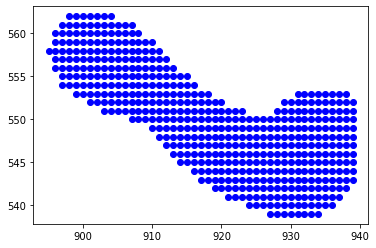

In [3]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(img, 30, 200)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img = np.zeros( (1000,1000) ) # create a single channel 200x200 pixel black image 
filled_array = cv2.fillPoly(img, pts =[contours[4]], color=(255))

obj = np.argwhere(filled_array == 255)

plt.plot(obj[:,0],obj[:,1], 'bo')

bin_arr = np.where(filled_array > 0, 1, 0)

#np.unique(bin_arr)

# Invert the horse image
image = bin_arr

# perform skeletonization
skeleton = skeletonize(image)

'''
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()
'''

binSkel = skeleton*1
skelObj = np.argwhere(binSkel == 1)
#plt.plot(skelObj[:,0],skelObj[:,1], 'bo')
#plt.show()

fil = FilFinder2D(binSkel, distance=250 * u.pc, mask=skeleton)
fil.preprocess_image(flatten_percent=85)
fil.create_mask(border_masking=True, verbose=False,
use_existing_mask=True)
fil.medskel(verbose=False)
fil.analyze_skeletons(branch_thresh=40* u.pix, skel_thresh=10 * u.pix, prune_criteria='length')

hey = np.argwhere(fil.skeleton_longpath==1)

In [4]:
fil.lengths()

<Quantity [42.21320344] pix>

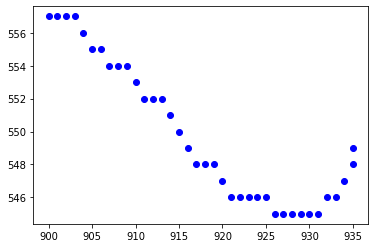

In [5]:
x = hey[:,0]
y = hey[:,1]
plt.plot(x,y, 'bo')
plt.show()